In [27]:
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
import sklearn.model_selection
%matplotlib inline

In [28]:
data = pd.read_csv('Cars93.csv')
x = np.array(data['Horsepower'])
y = np.array(data['Price'])

**Leave-one-out**

In [42]:
CV = np.ones(10)
for grado in range(10):    
    MSE = np.ones(len(x))
    
    for itera in range(len(x)):
        x = np.array(data['Horsepower'])
        y = np.array(data['Price'])   
        xout = x[itera]
        yout = y[itera]
        x = np.delete(x,itera)
        y = np.delete(y,itera)
        params = np.polyfit(x, y, grado)
        poli = np.poly1d(params)
        ymodel = poli(xout)
        MSE[itera] = (yout - ymodel)**2
    CV[grado] = np.sum(MSE)/len(y)       

Text(0.5,1,'Leave one out')

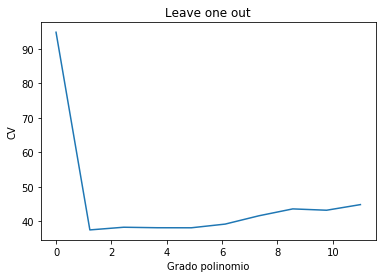

In [45]:
grado = np.linspace(0,11,10)
plt.plot(grado,CV)
plt.xlabel("Grado polinomio")
plt.ylabel("CV")
plt.title("Leave one out")

**K-Fold**

In [62]:
k = 10
CV = np.ones(10)
for grado in range(10):    
    MSE = np.ones(k)    
    for itera in range(k):
        x = np.array(data['Horsepower'])
        y = np.array(data['Price'])   
        kx = np.array_split(x,k)
        ky = np.array_split(y,k)
        xout = kx.pop(itera)
        yout = ky.pop(itera)
        
        params = np.polyfit(np.concatenate(kx),np.concatenate(ky), grado)
        poli = np.poly1d(params)
        ymodel = poli(xout)
        MSE[itera] = np.sum((yout - ymodel)**2)/len(kx)
    CV[grado] = np.sum(MSE)/k

Text(0.5,1,'K fold')

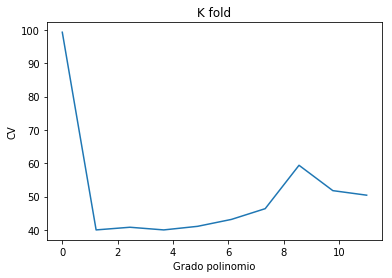

In [63]:
grado = np.linspace(0,11,10)
plt.plot(grado,CV)
plt.xlabel("Grado polinomio")
plt.ylabel("CV")
plt.title("K fold")

**BIC**

In [78]:
sigma = np.std(data.Price)
CV = np.ones(10)
def cv(n,p,loglk):
    return p*np.log(n)-2*loglk
def loglk(ymodel, y):
    p = np.log(1/(2*np.pi*sigma**2)**0.5)
    r = (ymodel-y)**2/2*sigma**2
    return np.sum(p-r)
for grado in range(1,11):    
    MSE = np.ones(len(x))
    x = np.array(data['Horsepower'])
    y = np.array(data['Price'])      
    params = np.polyfit(x, y, grado)
    poli = np.poly1d(params)
    ymodel = poli(y)
    loglks = loglk(ymodel,y)
    p = len(x)+1
    CV[grado-1] = cv(len(x),p,loglks)  

Text(0.5,1,'BIC')

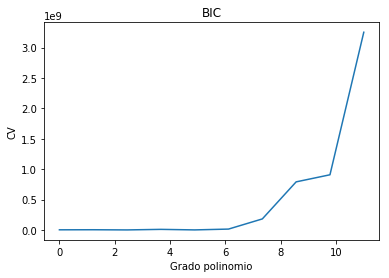

In [79]:
grado = np.linspace(0,11,10)
plt.plot(grado,CV)
plt.xlabel("Grado polinomio")
plt.ylabel("CV")
plt.title("BIC")